In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import seaborn as sns


import data


In [ ]:
solar_data = pd.read_csv('solar_sensor_data.csv')
solar_data

,LOCATION,DATE_TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,A,15-05-2020 00:00,sensor 1,0.0,0.0,0.0,6259559.0
1,A,15-05-2020 00:00,sensor 2,0.0,0.0,0.0,6183645.0
2,A,15-05-2020 00:00,sensor 3,0.0,0.0,0.0,6987759.0
3,A,15-05-2020 00:00,sensor 5,0.0,0.0,0.0,7602960.0
4,A,15-05-2020 00:00,sensor 12,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...,...
136471,B,6/17/2020 23:45,sensor 33,0.0,0.0,4157.0,520758.0
136472,B,6/17/2020 23:45,sensor 35,0.0,0.0,3931.0,121131356.0
136473,B,6/17/2020 23:45,sensor 38,0.0,0.0,4322.0,2427691.0
136474,B,6/17/2020 23:45,sensor 40,0.0,0.0,4218.0,106896394.0


In [ ]:
sdata = solar_data[20::21]
sdata

,LOCATION,DATE_TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
20,A,15-05-2020 00:00,sensor 44,0.0,0.0,0.0,7.116151e+06
41,A,15-05-2020 00:15,sensor 44,0.0,0.0,0.0,7.116151e+06
62,A,15-05-2020 00:30,sensor 44,0.0,0.0,0.0,7.116151e+06
83,A,15-05-2020 00:45,sensor 44,0.0,0.0,0.0,7.116151e+06
104,A,15-05-2020 01:00,sensor 43,0.0,0.0,0.0,6.339380e+06
...,...,...,...,...,...,...,...
136373,B,6/17/2020 22:45,sensor 13,0.0,0.0,4441.0,2.683351e+06
136394,B,6/17/2020 23:00,sensor 11,0.0,0.0,4121.0,2.827890e+08
136415,B,6/17/2020 23:15,sensor 10,0.0,0.0,3968.0,1.795116e+09
136436,B,6/17/2020 23:30,sensor 9,0.0,0.0,4251.0,2.018506e+07


In [ ]:
weather_data = pd.read_csv('weather_sensor_data.csv')
weather_data

,LOCATION,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,A,5/15/2020 0:00,25.184316,22.857507,0.0
1,A,5/15/2020 0:15,25.084589,22.761668,0.0
2,A,5/15/2020 0:30,24.935753,22.592306,0.0
3,A,5/15/2020 0:45,24.846130,22.360852,0.0
4,A,5/15/2020 1:00,24.621525,22.165423,0.0
...,...,...,...,...,...
6436,B,6/17/2020 22:45,23.511703,22.856201,0.0
6437,B,6/17/2020 23:00,23.482282,22.744190,0.0
6438,B,6/17/2020 23:15,23.354743,22.492245,0.0
6439,B,6/17/2020 23:30,23.291048,22.373909,0.0


Merge two datasets

In [ ]:
df = pd.merge(sdata, weather_data, on=['LOCATION','DATE_TIME'],how = 'inner')
df.head()

,LOCATION,DATE_TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,A,6/6/2020 0:00,sensor 34,0.0,0.0,0.0,7273090.0,22.474874,19.655617,0.0
1,A,6/6/2020 0:15,sensor 32,0.0,0.0,0.0,7331487.0,22.446710,19.740186,0.0
2,A,6/6/2020 0:30,sensor 28,0.0,0.0,0.0,6344476.0,22.326310,19.624400,0.0
3,A,6/6/2020 0:45,sensor 27,0.0,0.0,0.0,7341803.0,22.243927,19.516772,0.0
4,A,6/6/2020 1:00,sensor 26,0.0,0.0,0.0,6467251.0,22.207804,19.512128,0.0


In [ ]:
df.shape

(3320, 10)

Following code is added finally for Mongo DB part


In [ ]:
from pickle import TRUE
df.to_csv("merge_dataset.csv", index=TRUE)
print("merge data set saved to 'merge_dataset.csv'")

merge data set saved to 'merge_dataset.csv'


indexing the "DATE_TIME" as the index and drop the "DATE_TIME" column

In [ ]:
df.index = pd.to_datetime(df['DATE_TIME'], format='%m/%d/%Y %H:%M', dayfirst=False)
df.drop('DATE_TIME',axis=1,inplace=True)
df.head()

,LOCATION,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,,,,,
2020-06-06 00:00:00,A,sensor 34,0.0,0.0,0.0,7273090.0,22.474874,19.655617,0.0
2020-06-06 00:15:00,A,sensor 32,0.0,0.0,0.0,7331487.0,22.446710,19.740186,0.0
2020-06-06 00:30:00,A,sensor 28,0.0,0.0,0.0,6344476.0,22.326310,19.624400,0.0
2020-06-06 00:45:00,A,sensor 27,0.0,0.0,0.0,7341803.0,22.243927,19.516772,0.0
2020-06-06 01:00:00,A,sensor 26,0.0,0.0,0.0,6467251.0,22.207804,19.512128,0.0


In [ ]:
df.shape

(3320, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3320 entries, 2020-06-06 00:00:00 to 2020-06-17 23:45:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LOCATION             3320 non-null   object 
 1   SENSOR_ID            3320 non-null   object 
 2   DC_POWER             3320 non-null   float64
 3   AC_POWER             3320 non-null   float64
 4   DAILY_YIELD          3320 non-null   float64
 5   TOTAL_YIELD          3320 non-null   float64
 6   AMBIENT_TEMPERATURE  3320 non-null   float64
 7   MODULE_TEMPERATURE   3320 non-null   float64
 8   IRRADIATION          3320 non-null   float64
dtypes: float64(7), object(2)
memory usage: 259.4+ KB


In [ ]:
df.isnull().sum()

,0
LOCATION,0
SENSOR_ID,0
DC_POWER,0
AC_POWER,0
DAILY_YIELD,0
TOTAL_YIELD,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
IRRADIATION,0


In [ ]:
duplicates = df.duplicated().sum()
duplicates


0

#EDA part

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,3320.0,3.231407e+02,8.667156e+02,0.000000,0.000000e+00,0.000000e+00,4.600483e+02,1.380629e+04
AC_POWER,3320.0,2.423342e+02,3.640218e+02,0.000000,0.000000e+00,0.000000e+00,4.381750e+02,1.384347e+03
DAILY_YIELD,3320.0,3.231214e+03,2.922675e+03,0.000000,1.766000e+02,2.786500e+03,5.520000e+03,9.729000e+03
TOTAL_YIELD,3320.0,7.423325e+08,7.389865e+08,0.000000,1.995782e+07,3.295919e+08,1.412168e+09,2.247916e+09
AMBIENT_TEMPERATURE,3320.0,2.787786e+01,4.043333e+00,20.398505,2.450080e+01,2.678219e+01,3.076335e+01,3.918164e+01
MODULE_TEMPERATURE,3320.0,3.251013e+01,1.126836e+01,18.140415,2.362708e+01,2.733246e+01,3.999502e+01,6.663595e+01
IRRADIATION,3320.0,2.290076e-01,3.092699e-01,0.000000,0.000000e+00,1.909098e-02,4.294390e-01,1.098766e+00


In [ ]:
df.describe(include ="object")

,LOCATION,SENSOR_ID
count,3320,3320
unique,2,44
top,B,sensor 18
freq,3223,242


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Lets plot histogram to understand the distribution of data

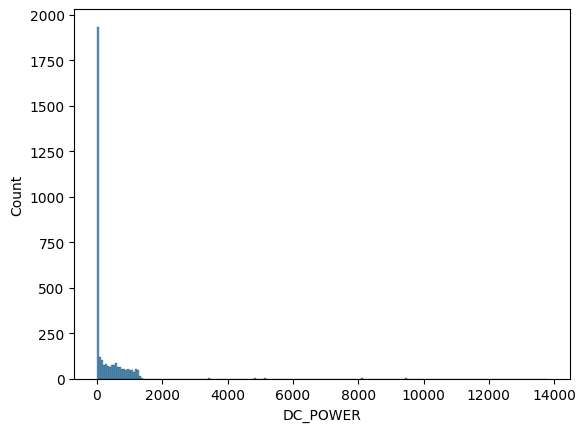

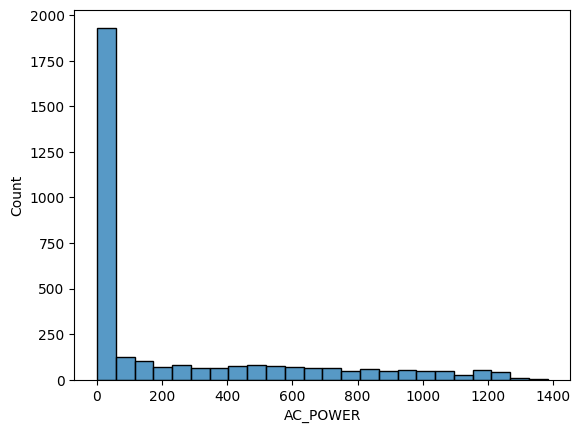

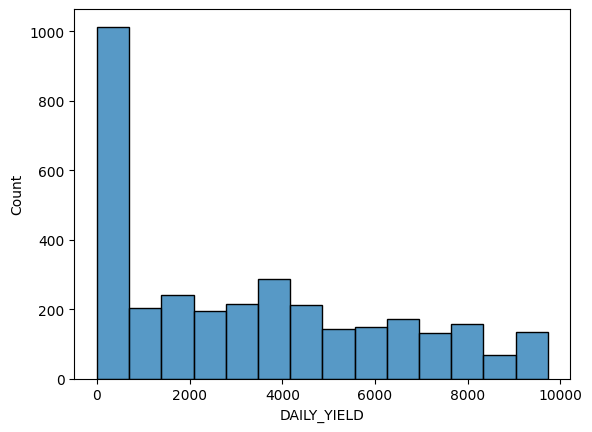

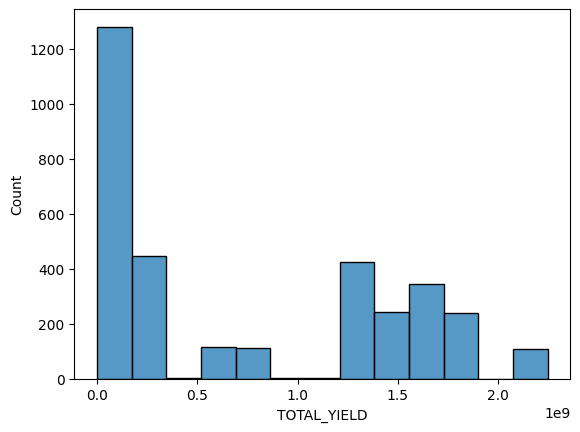

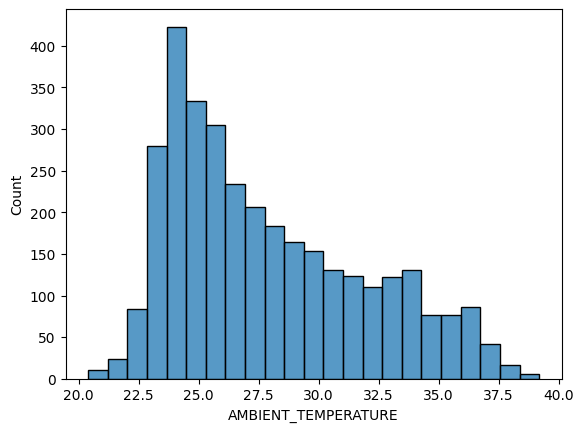

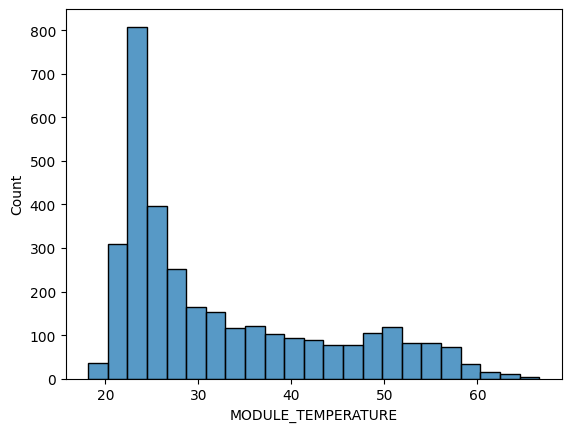

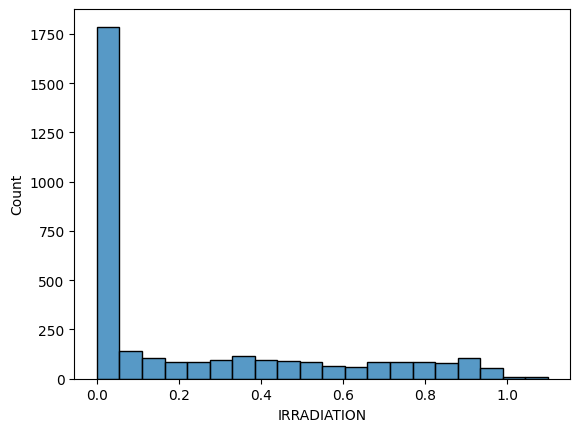

In [ ]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

Lets IDentify the outlier using boxplot

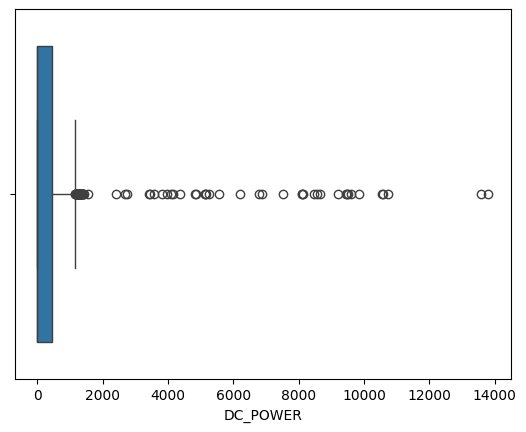

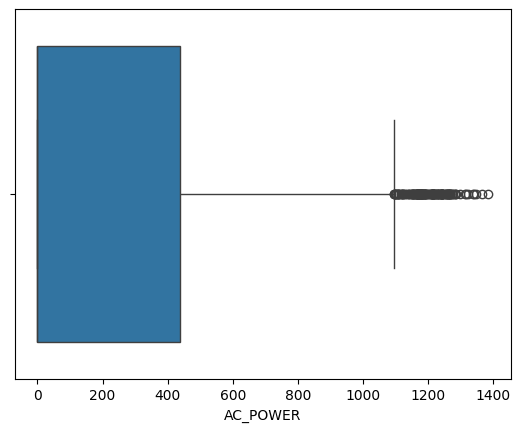

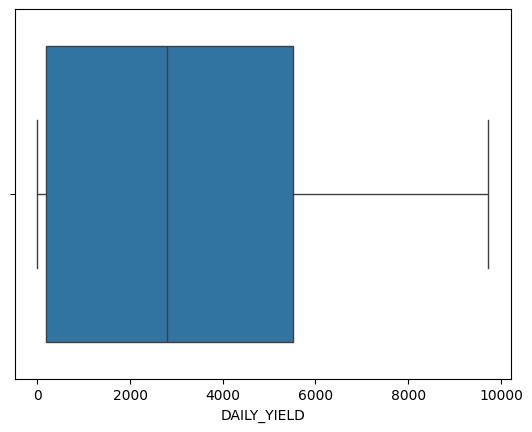

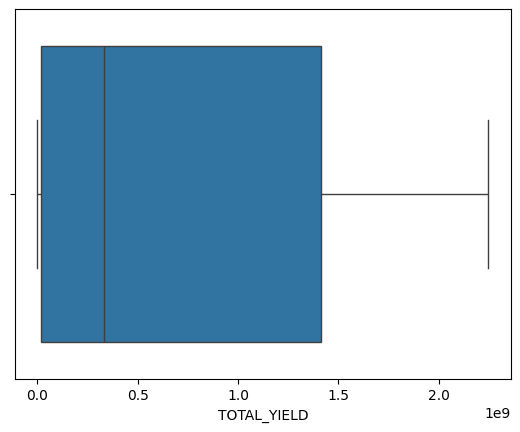

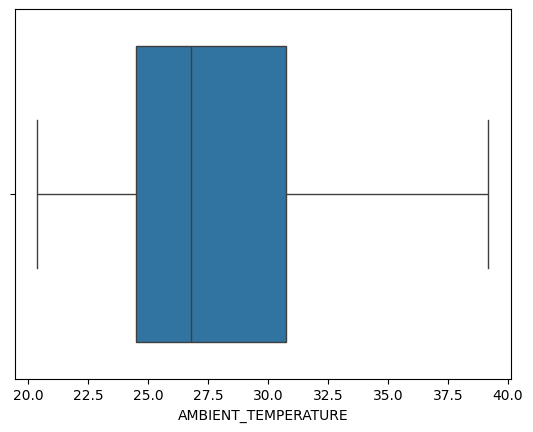

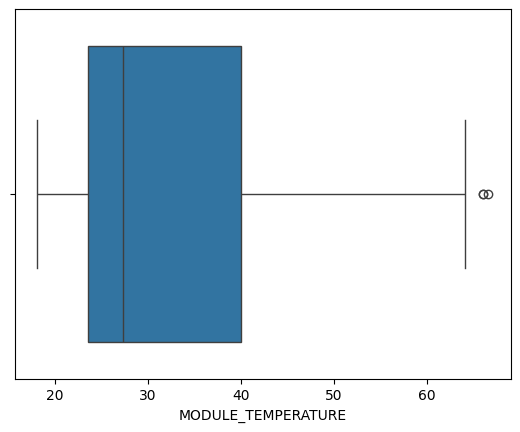

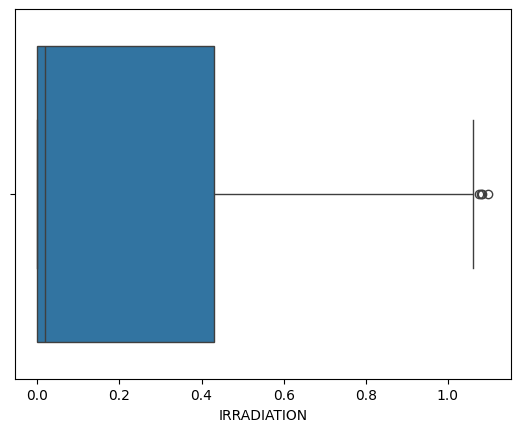

In [ ]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

Lets find the corelation of each features


In [ ]:
df.select_dtypes(include="number").corr()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DC_POWER,1.000000,0.556478,0.008776,-0.075058,0.231158,0.409964,0.439303
AC_POWER,0.556478,1.000000,0.018798,0.026712,0.553350,0.749060,0.784947
DAILY_YIELD,0.008776,0.018798,1.000000,-0.053121,0.334839,0.063354,-0.093327
TOTAL_YIELD,-0.075058,0.026712,-0.053121,1.000000,0.099078,0.047628,0.019157
AMBIENT_TEMPERATURE,0.231158,0.553350,0.334839,0.099078,1.000000,0.846545,0.668294
MODULE_TEMPERATURE,0.409964,0.749060,0.063354,0.047628,0.846545,1.000000,0.945898
IRRADIATION,0.439303,0.784947,-0.093327,0.019157,0.668294,0.945898,1.000000


Lets use heat map to understand the correlation more

<Axes: >

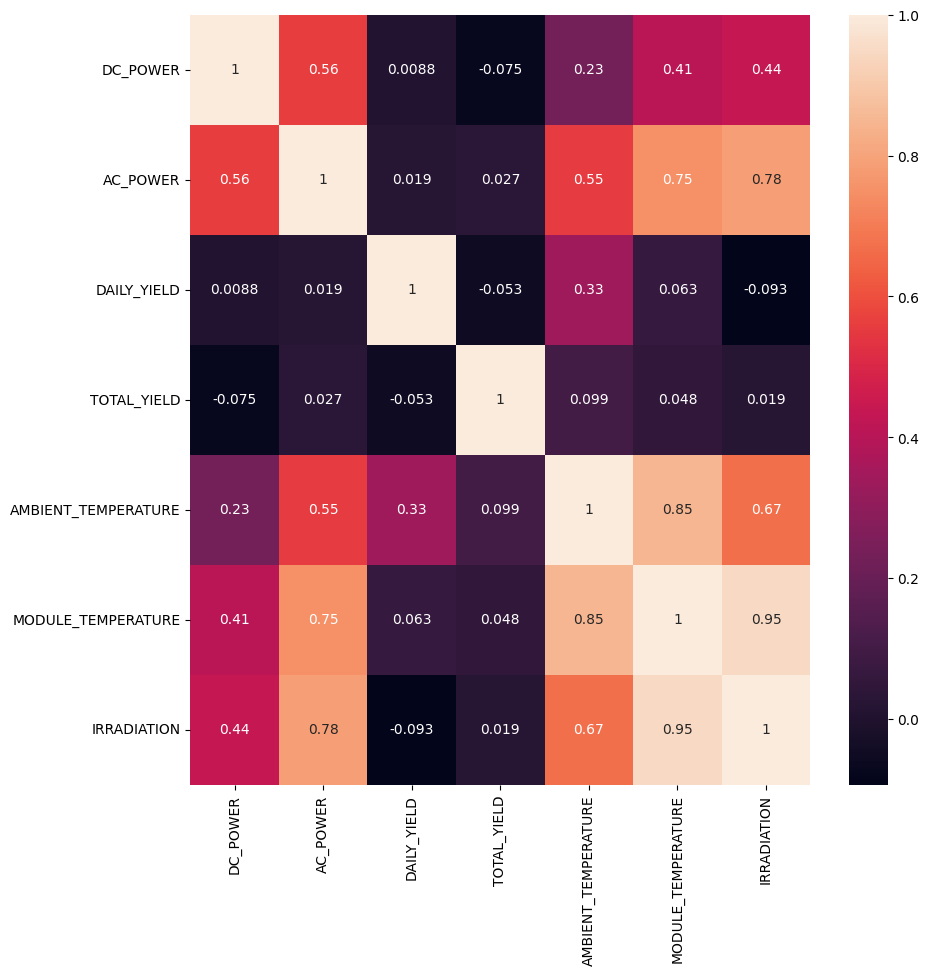

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include="number").corr(), annot= True)

In [ ]:
#Remove categorical
Sfeatures = ["DC_POWER","AC_POWER", "DAILY_YIELD", "TOTAL_YIELD", "AMBIENT_TEMPERATURE","MODULE_TEMPERATURE", "IRRADIATION"]
data_features = df[Sfeatures]


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

Using LSTM for Model building

In [ ]:
# Normalizing the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_features)


train_size = int(len(data_scaled) * 0.8)  # 80% for training
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Prepare data for LSTM
sequence_length = 50
X = []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i])
X = np.array(X)


def prepare_sequences(data):
    X = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
    return np.array(X)


X_train = prepare_sequences(train_data)
X_test = prepare_sequences(test_data)

In [ ]:
# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(X_train.shape[2], activation='linear')
])
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train, train_data[sequence_length:], epochs=10, batch_size=32, validation_split=0.1)

# Predict reconstruction errors
X_test_pred = model.predict(X_test)
reconstruction_errors = np.mean(np.abs(X_test_pred - test_data[sequence_length:]), axis=1)

# Determine anomalies based on a threshold
threshold = np.percentile(reconstruction_errors, 95)
anomalies = reconstruction_errors > threshold


df['anomaly_lstm'] = 0
df.iloc[train_size + sequence_length:, df.columns.get_loc('anomaly_lstm')] = anomalies.astype(int)




Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0938 - val_loss: 0.0389
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0356 - val_loss: 0.0318
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0295 - val_loss: 0.0311
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0292 - val_loss: 0.0295
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0274 - val_loss: 0.0295
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0266 - val_loss: 0.0286
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0264 - val_loss: 0.0281
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0262 - val_loss: 0.0288
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0264 - val_loss: 0.0282
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0259 - val_loss: 0.0278
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


Visualizing anomalies

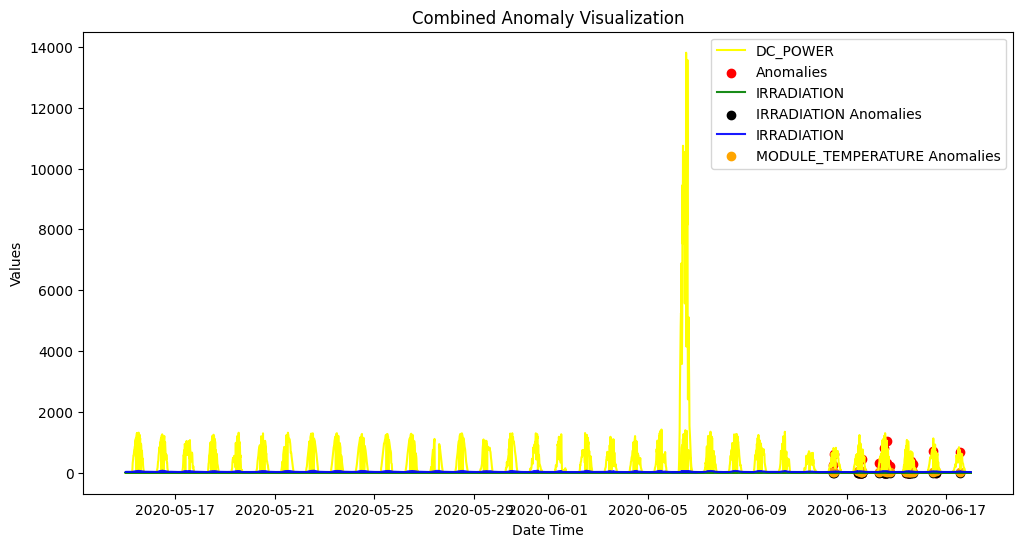

In [ ]:
#plot for DC_POWER
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['DC_POWER'], label='DC_POWER', color='yellow')
anomalies = df[df['anomaly_lstm'] == 1]
plt.scatter(anomalies.index, anomalies['DC_POWER'], color='red', label='Anomalies')
# Plot for IRRADIATION
plt.plot(df.index, df['IRRADIATION'], label='IRRADIATION', color='green', alpha=0.9)
irr_anomalies = df[df['anomaly_lstm'] == 1]
plt.scatter(irr_anomalies.index, irr_anomalies['IRRADIATION'], color='black', label='IRRADIATION Anomalies')

# Plot for MODULE_TEMPERATURE
plt.plot(df.index, df['MODULE_TEMPERATURE'], label='IRRADIATION', color='blue', alpha=0.9)
MTemp_anomalies = df[df['anomaly_lstm'] == 1]
plt.scatter(MTemp_anomalies.index, MTemp_anomalies['MODULE_TEMPERATURE'], color='Orange', label='MODULE_TEMPERATURE Anomalies')

plt.title("Combined Anomaly Visualization")
plt.xlabel("Date Time")
plt.ylabel("Values")
plt.legend()
plt.show()


In [ ]:
df.to_csv("anomaly_results.csv", index=TRUE)
print("Anomaly detection results saved to 'anomaly_results.csv'")

Anomaly detection results saved to 'anomaly_results.csv'


In [ ]:
!pip install apache-airflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━

In [ ]:
from airflow.models import DAG
from airflow.operators.python import PythonOperator
from datetime import datetime, timedelta